# Fundamentals of Social Data Science 2025. Week 1. Day 2. Exercises

This is our group assignment.

You will be expected to submit an individual assignment on Tuesday at 12pm (not Monday) on Canvas. The sheet that you will be expected to submit will be released on Friday at 12pm. It is submitted on Tuesday because you will want to integrate your materials post-presentation. 

- That sheet will have a small number of individual questions related to Friday's assignment
- It will include one question about your presentation. That question is reproduced below so there are no surprises. 

The assignment submission details will be posted on Canvas under assignments.

To itemise: 
- Week 1. Day 2. Wednesday at 12pm: This "getting started" sheet is released. 
- Wednesday afternoon tutorial: We will want to ensure that you can get started on loading data. 
- Week 1. Day 3. Friday at 12pm: The individual assignment is released. 
- Week 1. Day 3. Friday afternoon tutorial: You will want to play with the Claude artifact as well as continue working with your group. 
- Week 2. Day 1. Monday at 12pm: An exercise will be released related to Network Canvas. It will require you to download Network Canvas interviewer from networkcanvas.com. 
- Week 2. Day 1. Monday afternoon tutorial: Bernie will explain the Network Canvas exercise as a part of the class. The tutorial period will be group presentations. 
- Tuesday at 12pm: Your individual assignment is due. 
- Tuesday at 12pm: Your group assignment should be posted. 

> **NOTE:** This assignment will use data from the web. This assignment has NOT been cleared for research via the CUREC process. It is an in-class assignment. Therefore, if you wish to publish anything from this analysis, you must first apply for a CUREC before publishing anything publicly with your Oxford affiliation. 

# Group exercise: Getting started

The group assignment will make use of the StackDownloader from the FSSTDS repository. This downloader (recently tested) will download, extract and process a StackExchange archive. It is pretty close to 'one click'. It creates a 'feather' archive, which is a very nice format for compressing DataFrames. You can open this in your own code. 

To begin, you will need to have everything installed for the StackDownloader. How do we do that? We install the requirements.

- **Step 1.** Clone the FSSTDS repository. 
- **Step 2.** Open the Ch.00.Stack_downloader and 'select kernel', select "Python Environments...", "Create Python Environment", "Venv -> Creates a `.venv` virtual environment in the current workspace", select **Python 3.12**. Note 3.14 is untested. Select dependencies to install -> requirements.txt. 
- **Step 3.** Run the big code cell in Stack_downloader. Select a specific archive. 
- **Step 4.** Locate and load the DataFrame. You can now use the Stack Exchange in your work. 

Note if you get errors with PyArrow below, try restarting the kernel. 

In [7]:
# In case this Jupyter Notebook is in a different repo than FSSTDS, you may need to install
# pandas and pyarrow to parse the file. 
import sys
import subprocess

subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "pandas", "pyarrow"])


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


0

In [8]:
# Q0. Check that you can load your own DataFrame
 
import pandas as pd 

stack_df = df = pd.read_feather('../data/gardening.stackexchange.com/Posts.feather')

print(stack_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44155 entries, 0 to 44154
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Id                     44155 non-null  object        
 1   PostTypeId             44155 non-null  object        
 2   AcceptedAnswerId       7733 non-null   object        
 3   CreationDate           44155 non-null  datetime64[ns]
 4   Score                  44155 non-null  int64         
 5   ViewCount              17860 non-null  float64       
 6   Body                   44155 non-null  object        
 7   OwnerUserId            43628 non-null  object        
 8   LastEditorUserId       18450 non-null  object        
 9   LastEditDate           18543 non-null  datetime64[ns]
 10  LastActivityDate       44155 non-null  datetime64[ns]
 11  Title                  17860 non-null  object        
 12  Tags                   17860 non-null  object        
 13  A

# Q1. Navigating the data. 

Let's begin with some exploratory data analysis. Despite being a group assignment, you should individually be able to accomplish the following. 

1. The data contains different post types. How many questions and how many answers? Try: `display(stack_df['PostTypeId'].value_counts())` 
2. How many users are in this data set? 
3. What is the average score of the user?
4. What is the average number of comments for the users?
5. Plot the distribution of the number of comments by user. Is it normally distributed?  

In [9]:
# Answers to Q1.1...Q1.5 
# (Unsubmitted; merely for practice and preparation; 
# every student should be able to do this themselves. 



## Q2. Defining helpfulness 

If you can describe the data simply then you are on your way to the big question for the group. Recall two of the trade-offs from the last lecture: "operationalisation" and "coding". The group project this week is very simple in some senses and very complex in other senses: 

Two questions: 
> - "How can we identify the most helpful users in this space" 
> - "When were the helpful users the most helpful or most active?"

So this means that your group will have to discuss:
- What defines helpfulness? Are there multiple possible metrics? 
- Do we think that a helpful person should _always_ be helpful? 
- Is helpfulness topic-specific? 
- You may want to explore wrangling the data by time. 

We do not expect you to merge in data from the users.xml / users.feather for this. However, you may want to explore how to create a datatime column. This is not covered in this lecture, but you may want to read either Chapter 10 of FSSTDS on cleaning data and Chapter 12 of FSSTDS on wrangling time data. 

You will want to divide some tasks among your group. Some might be delegated to surf the space online to come up with abductive hypotheses. Some might want to focus on rendering some charts. Some might be excellent at presentation design or at presenting to the group. Lean into your expertise and collaborate.

Presentations for this will be on Monday afternoon. The presentations will be no more than 12 minutes + 3 minutes of questions & transition. 

Each group will have a 'space' on Canvas to submit 3 things: 
- the presentation 
- the code
- the 'credits'. A single sheet (in docx/md) that details which group members participated in which ways. Treat this not merely as accountability but an opportunity to signal your own strengths. We do not expect everyone to do 1/5 of the work for every task. We do expect everyone to contribute in some way.

This code will not be graded but it will be made available to other students. 
The presentations will be given short written feedback by the instructor post-presentation.

# Import data

In [10]:
import pandas as pd

In [11]:
post_df = pd.read_feather('../data/gardening.stackexchange.com/Posts.feather')
post_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44155 entries, 0 to 44154
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Id                     44155 non-null  object        
 1   PostTypeId             44155 non-null  object        
 2   AcceptedAnswerId       7733 non-null   object        
 3   CreationDate           44155 non-null  datetime64[ns]
 4   Score                  44155 non-null  int64         
 5   ViewCount              17860 non-null  float64       
 6   Body                   44155 non-null  object        
 7   OwnerUserId            43628 non-null  object        
 8   LastEditorUserId       18450 non-null  object        
 9   LastEditDate           18543 non-null  datetime64[ns]
 10  LastActivityDate       44155 non-null  datetime64[ns]
 11  Title                  17860 non-null  object        
 12  Tags                   17860 non-null  object        
 13  A

In [12]:
post_df.columns

Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'CreationDate', 'Score',
       'ViewCount', 'Body', 'OwnerUserId', 'LastEditorUserId', 'LastEditDate',
       'LastActivityDate', 'Title', 'Tags', 'AnswerCount', 'CommentCount',
       'ContentLicense', 'ParentId', 'FavoriteCount', 'CommunityOwnedDate',
       'OwnerDisplayName', 'ClosedDate', 'LastEditorDisplayName', 'BodyText',
       'BodyURLs', 'TagsList'],
      dtype='object')

# Clean data

In [13]:
post_df['CreationDate'] = pd.to_datetime(post_df['CreationDate'])
post_df['CreationDate'].head()

0   2011-06-08 18:35:50.450
1   2011-06-08 18:37:12.493
2   2011-06-08 18:37:45.593
3   2011-06-08 18:37:53.583
4   2011-06-08 18:38:53.847
Name: CreationDate, dtype: datetime64[ns]

In [14]:
post_df = post_df[post_df['PostTypeId'].isin(['1', '2'])].copy() # filter posts to questions (type 1) and answers (type 2)
post_df['PostType'] = post_df['PostTypeId'].map({'1': 'Q', '2': 'A'})
post_df.head()

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,...,ParentId,FavoriteCount,CommunityOwnedDate,OwnerDisplayName,ClosedDate,LastEditorDisplayName,BodyText,BodyURLs,TagsList,PostType
0,1,1,9,2011-06-08 18:35:50.450,27,152839.0,<p>Which side of a house will get the most sun...,9,109,2011-07-25 05:14:51.753,...,None,NaN,NaT,None,NaT,None,Which side of a house will get the most sunlig...,[],[houseplants|sunlight],Q
1,2,1,64,2011-06-08 18:37:12.493,28,3128.0,"<p>When I try to grow ""upside-down"" tomatoes, ...",11,109,2011-07-06 19:04:30.607,...,None,NaN,NaT,None,NaT,None,"When I try to grow ""upside-down"" tomatoes, the...",[],[tomatoes],Q
2,3,1,29,2011-06-08 18:37:45.593,35,4732.0,<p>I've got what I think is a cedar tree in my...,6,109,2011-07-17 14:35:42.393,...,None,NaN,NaT,None,NaT,None,I've got what I think is a cedar tree in my ba...,[],[trees|tree-care],Q
3,4,1,11,2011-06-08 18:37:53.583,31,404.0,"<p>I've got a big, lovely rhubarb plant in my ...",20,7305,2016-02-19 00:47:35.537,...,None,NaN,NaT,None,NaT,None,"I've got a big, lovely rhubarb plant in my yar...",[],[rhubarb|vegetables|harvesting],Q
4,5,2,None,2011-06-08 18:38:53.847,10,NaN,<p>This question depends on context. </p>\n\n...,31,31,2011-06-08 19:09:41.273,...,1,NaN,NaT,None,NaT,None,This question depends on context. I could s...,[],[],A


# Join questions to answers 

In [15]:
right = post_df[['Id', 'CreationDate', 'Score', 'OwnerUserId']]

In [16]:
post_df = pd.merge(left = post_df, right = right, how = 'left', left_on = 'AcceptedAnswerId', right_on = 'Id')
post_df.head()

,Id_x,PostTypeId,AcceptedAnswerId,CreationDate_x,Score_x,ViewCount,Body,OwnerUserId_x,LastEditorUserId,LastEditDate,...,ClosedDate,LastEditorDisplayName,BodyText,BodyURLs,TagsList,PostType,Id_y,CreationDate_y,Score_y,OwnerUserId_y
0,1,1,9,2011-06-08 18:35:50.450,27,152839.0,<p>Which side of a house will get the most sun...,9,109,2011-07-25 05:14:51.753,...,NaT,None,Which side of a house will get the most sunlig...,[],[houseplants|sunlight],Q,9,2011-06-08 18:39:49.137,30.0,32
1,2,1,64,2011-06-08 18:37:12.493,28,3128.0,"<p>When I try to grow ""upside-down"" tomatoes, ...",11,109,2011-07-06 19:04:30.607,...,NaT,None,"When I try to grow ""upside-down"" tomatoes, the...",[],[tomatoes],Q,64,2011-06-08 19:27:25.093,19.0,60
2,3,1,29,2011-06-08 18:37:45.593,35,4732.0,<p>I've got what I think is a cedar tree in my...,6,109,2011-07-17 14:35:42.393,...,NaT,None,I've got what I think is a cedar tree in my ba...,[],[trees|tree-care],Q,29,2011-06-08 18:58:57.390,19.0,47
3,4,1,11,2011-06-08 18:37:53.583,31,404.0,"<p>I've got a big, lovely rhubarb plant in my ...",20,7305,2016-02-19 00:47:35.537,...,NaT,None,"I've got a big, lovely rhubarb plant in my yar...",[],[rhubarb|vegetables|harvesting],Q,11,2011-06-08 18:40:29.263,23.0,23
4,5,2,None,2011-06-08 18:38:53.847,10,NaN,<p>This question depends on context. </p>\n\n...,31,31,2011-06-08 19:09:41.273,...,NaT,None,This question depends on context. I could s...,[],[],A,NaN,NaT,NaN,NaN


In [17]:
question_df = post_df[post_df['PostType'] == 'Q']

# Create "helpful" indicator variables 

In [18]:
question_df.AcceptedAnswerId.isna().value_counts()

AcceptedAnswerId
True     10127
False     7733
Name: count, dtype: int64

In [19]:
question_df['accepted_answer_delay'] = question_df['CreationDate_y'] - question_df['CreationDate_x']
question_df['is_helpful'] = question_df['accepted_answer_delay'].dt.days <= 2
question_df.head()

/var/folders/92/wbzrs_790cx5cmbrl2t79xx00000gn/T/ipykernel_15512/3174777814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  question_df['accepted_answer_delay'] = question_df['CreationDate_y'] - question_df['CreationDate_x']
/var/folders/92/wbzrs_790cx5cmbrl2t79xx00000gn/T/ipykernel_15512/3174777814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  question_df['is_helpful'] = question_df['accepted_answer_delay'].dt.days <= 2


,Id_x,PostTypeId,AcceptedAnswerId,CreationDate_x,Score_x,ViewCount,Body,OwnerUserId_x,LastEditorUserId,LastEditDate,...,BodyText,BodyURLs,TagsList,PostType,Id_y,CreationDate_y,Score_y,OwnerUserId_y,accepted_answer_delay,is_helpful
0,1,1,9,2011-06-08 18:35:50.450,27,152839.0,<p>Which side of a house will get the most sun...,9,109,2011-07-25 05:14:51.753,...,Which side of a house will get the most sunlig...,[],[houseplants|sunlight],Q,9,2011-06-08 18:39:49.137,30.0,32,0 days 00:03:58.687000,True
1,2,1,64,2011-06-08 18:37:12.493,28,3128.0,"<p>When I try to grow ""upside-down"" tomatoes, ...",11,109,2011-07-06 19:04:30.607,...,"When I try to grow ""upside-down"" tomatoes, the...",[],[tomatoes],Q,64,2011-06-08 19:27:25.093,19.0,60,0 days 00:50:12.600000,True
2,3,1,29,2011-06-08 18:37:45.593,35,4732.0,<p>I've got what I think is a cedar tree in my...,6,109,2011-07-17 14:35:42.393,...,I've got what I think is a cedar tree in my ba...,[],[trees|tree-care],Q,29,2011-06-08 18:58:57.390,19.0,47,0 days 00:21:11.797000,True
3,4,1,11,2011-06-08 18:37:53.583,31,404.0,"<p>I've got a big, lovely rhubarb plant in my ...",20,7305,2016-02-19 00:47:35.537,...,"I've got a big, lovely rhubarb plant in my yar...",[],[rhubarb|vegetables|harvesting],Q,11,2011-06-08 18:40:29.263,23.0,23,0 days 00:02:35.680000,True
5,6,1,None,2011-06-08 18:39:09.920,29,4531.0,<p>My town recently took down a large 80 year ...,23,23,2011-06-08 18:58:27.547,...,My town recently took down a large 80 year old...,[http://www.ext.colostate.edu/pubs/garden/0741...,[trees|shade],Q,NaN,NaT,NaN,NaN,NaT,False


In [20]:
question_df.is_helpful.value_counts(normalize=True)

is_helpful
False    0.620829
True     0.379171
Name: proportion, dtype: float64

# Examine helpfulness over time 

In [21]:
helpful_answers = question_df[question_df['is_helpful']][['OwnerUserId_y', 'CreationDate_y']]
helpful_answers['month'] = pd.to_datetime((helpful_answers['CreationDate_y'] - pd.offsets.MonthBegin(1)).dt.floor('D'))
helpful_answers

,OwnerUserId_y,CreationDate_y,month
0,32,2011-06-08 18:39:49.137,2011-06-01
1,60,2011-06-08 19:27:25.093,2011-06-01
2,47,2011-06-08 18:58:57.390,2011-06-01
3,23,2011-06-08 18:40:29.263,2011-06-01
6,5,2011-06-09 22:53:27.483,2011-06-01
...,...,...,...
43176,25986,2024-03-11 16:21:52.687,2024-03-01
43212,1380,2024-03-18 19:02:22.350,2024-03-01
43228,1380,2024-03-24 15:53:42.740,2024-03-01
43239,25986,2024-03-25 18:00:03.633,2024-03-01


In [22]:
mi, ma = helpful_answers.month.min(), helpful_answers.month.max()
cross = pd.MultiIndex.from_product([pd.date_range(start=mi, end=ma, freq="M"), helpful_answers.OwnerUserId_y.unique()])

/var/folders/92/wbzrs_790cx5cmbrl2t79xx00000gn/T/ipykernel_15512/3558476448.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cross = pd.MultiIndex.from_product([pd.date_range(start=mi, end=ma, freq="M"), helpful_answers.OwnerUserId_y.unique()])


In [23]:
helpful_answers

,OwnerUserId_y,CreationDate_y,month
0,32,2011-06-08 18:39:49.137,2011-06-01
1,60,2011-06-08 19:27:25.093,2011-06-01
2,47,2011-06-08 18:58:57.390,2011-06-01
3,23,2011-06-08 18:40:29.263,2011-06-01
6,5,2011-06-09 22:53:27.483,2011-06-01
...,...,...,...
43176,25986,2024-03-11 16:21:52.687,2024-03-01
43212,1380,2024-03-18 19:02:22.350,2024-03-01
43228,1380,2024-03-24 15:53:42.740,2024-03-01
43239,25986,2024-03-25 18:00:03.633,2024-03-01


In [24]:
cross

MultiIndex([('2010-07-31',    '32'),
            ('2010-07-31',    '60'),
            ('2010-07-31',    '47'),
            ('2010-07-31',    '23'),
            ('2010-07-31',     '5'),
            ('2010-07-31',    '26'),
            ('2010-07-31',    '42'),
            ('2010-07-31',    '10'),
            ('2010-07-31',    '51'),
            ('2010-07-31',    '55'),
            ...
            ('2024-02-29', '41784'),
            ('2024-02-29', '41978'),
            ('2024-02-29', '40768'),
            ('2024-02-29', '42053'),
            ('2024-02-29', '42079'),
            ('2024-02-29', '42262'),
            ('2024-02-29', '42497'),
            ('2024-02-29', '42708'),
            ('2024-02-29', '43548'),
            ('2024-02-29', '37649')],
           length=91840)

In [25]:
post_df

,Id_x,PostTypeId,AcceptedAnswerId,CreationDate_x,Score_x,ViewCount,Body,OwnerUserId_x,LastEditorUserId,LastEditDate,...,ClosedDate,LastEditorDisplayName,BodyText,BodyURLs,TagsList,PostType,Id_y,CreationDate_y,Score_y,OwnerUserId_y
0,1,1,9,2011-06-08 18:35:50.450,27,152839.0,<p>Which side of a house will get the most sun...,9,109,2011-07-25 05:14:51.753,...,NaT,None,Which side of a house will get the most sunlig...,[],[houseplants|sunlight],Q,9,2011-06-08 18:39:49.137,30.0,32
1,2,1,64,2011-06-08 18:37:12.493,28,3128.0,"<p>When I try to grow ""upside-down"" tomatoes, ...",11,109,2011-07-06 19:04:30.607,...,NaT,None,"When I try to grow ""upside-down"" tomatoes, the...",[],[tomatoes],Q,64,2011-06-08 19:27:25.093,19.0,60
2,3,1,29,2011-06-08 18:37:45.593,35,4732.0,<p>I've got what I think is a cedar tree in my...,6,109,2011-07-17 14:35:42.393,...,NaT,None,I've got what I think is a cedar tree in my ba...,[],[trees|tree-care],Q,29,2011-06-08 18:58:57.390,19.0,47
3,4,1,11,2011-06-08 18:37:53.583,31,404.0,"<p>I've got a big, lovely rhubarb plant in my ...",20,7305,2016-02-19 00:47:35.537,...,NaT,None,"I've got a big, lovely rhubarb plant in my yar...",[],[rhubarb|vegetables|harvesting],Q,11,2011-06-08 18:40:29.263,23.0,23
4,5,2,None,2011-06-08 18:38:53.847,10,NaN,<p>This question depends on context. </p>\n\n...,31,31,2011-06-08 19:09:41.273,...,NaT,None,This question depends on context. I could s...,[],[],A,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43276,66224,2,None,2024-03-31 04:12:48.200,0,NaN,<p>Magnesium-deficiency can look like that on ...,7111,None,NaT,...,NaT,None,Magnesium-deficiency can look like that on tom...,[],[],A,NaN,NaT,NaN,NaN
43277,66225,1,None,2024-03-31 05:50:01.790,2,27.0,<p>Landscaper installed emerald green trees ap...,44269,None,NaT,...,NaT,None,Landscaper installed emerald green trees appro...,[https://i.stack.imgur.com/RYuPF.jpg],[trees],Q,NaN,NaT,NaN,NaN
43278,66226,1,None,2024-03-31 14:01:30.920,1,32.0,"<p>Just moved into a new home, and although th...",44270,44270,2024-03-31 19:14:17.943,...,NaT,None,"Just moved into a new home, and although the A...","[https://i.stack.imgur.com/10HtE.png, https://...",[pruning|trimming],Q,NaN,NaT,NaN,NaN
43279,66227,1,None,2024-03-31 15:42:28.683,1,48.0,<p>I'm trying to convert my backyard into a ve...,44264,None,NaT,...,NaT,None,I'm trying to convert my backyard into a veget...,[],[vegetables|compost|topsoil],Q,NaN,NaT,NaN,NaN


In [26]:
user_first_posted_at = post_df.groupby('OwnerUserId_x')['CreationDate_x'].min()
user_last_posted_at = post_df.groupby('OwnerUserId_x')['CreationDate_x'].max()

In [27]:
grouped = helpful_answers.groupby([pd.Grouper(key='month'), 'OwnerUserId_y']).\
    size().\
    rename('num_helpful_answers').\
    reset_index().\
    sort_values(['OwnerUserId_y', 'month'])

In [28]:
grouped.set_index(['month', 'OwnerUserId_y'])

,,num_helpful_answers
month,OwnerUserId_y,
2011-06-01,10,9
2011-08-01,10,1
2012-04-01,1007,1
2011-06-01,102,3
2012-03-01,102,1
...,...,...
2011-07-01,98,1
2011-06-01,99,4
2011-08-01,99,1


look at users over the most recent 1 year of data; only select users who have a post prior to 1 year 'ago'

In [28]:
helpful_answers.shape

(6772, 3)

<Axes: xlabel='month'>

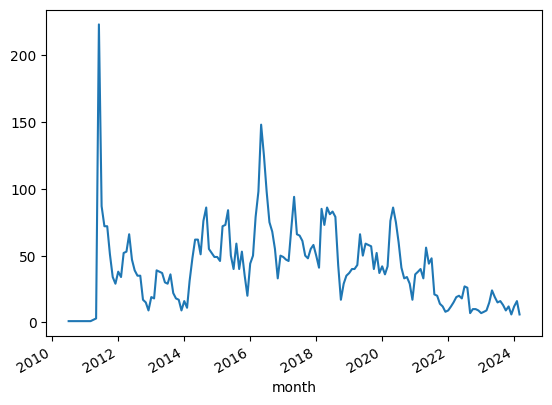

In [29]:
helpful_answers.groupby('month').size().plot()

In [36]:
included_users = user_first_posted_at[(user_first_posted_at < (ma - pd.DateOffset(years=1))) & \
    (user_last_posted_at >= (ma - pd.DateOffset(years=1))) ].index
included_users

Index(['1085', '10880', '11010', '11039', '11360', '11410', '11453', '11467',
       '11489', '1177',
       ...
       '5734', '658', '6806', '6951', '7111', '7240', '7262', '7288', '7456',
       '754'],
      dtype='object', name='OwnerUserId_x', length=173)

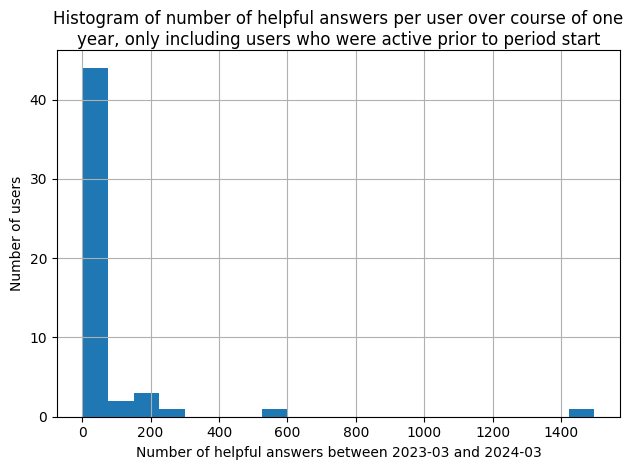

In [49]:
user_helpful_answer_count = helpful_answers[helpful_answers['OwnerUserId_y'].isin(included_users)].groupby('OwnerUserId_y').size().sort_values(ascending=False)
user_helpful_answer_count.hist(bins=20)
from matplotlib import pyplot as plt
plt.xlabel(f'Number of helpful answers between {ma - pd.DateOffset(years=1):%Y-%m} and {ma:%Y-%m}')
plt.ylabel('Number of users')
plt.title('Histogram of number of helpful answers per user over course of one year, only including users who were active prior to period start', wrap=True)
plt.tight_layout()

In [131]:
grouped.set_index([ 'month', 'OwnerUserId_y'])['num_helpful_answers'].reindex(index=cross, fill_value=0).reset_index().\
    rename(columns={'level_0': 'month', 'level_1': 'user_id'})

,month,user_id,num_helpful_answers
0,2010-07-31,32,0
1,2010-07-31,60,0
2,2010-07-31,47,0
3,2010-07-31,23,0
4,2010-07-31,5,0
...,...,...,...
91835,2024-02-29,42262,0
91836,2024-02-29,42497,0
91837,2024-02-29,42708,0
91838,2024-02-29,43548,3


In [32]:
grouped[grouped['num_helpful_answers'] > 95]

,month,OwnerUserId_y,num_helpful_answers


In [125]:
cross

MultiIndex([('2010-07-31',    '32'),
            ('2010-07-31',    '60'),
            ('2010-07-31',    '47'),
            ('2010-07-31',    '23'),
            ('2010-07-31',     '5'),
            ('2010-07-31',    '26'),
            ('2010-07-31',    '42'),
            ('2010-07-31',    '10'),
            ('2010-07-31',    '51'),
            ('2010-07-31',    '55'),
            ...
            ('2024-02-29', '41784'),
            ('2024-02-29', '41978'),
            ('2024-02-29', '40768'),
            ('2024-02-29', '42053'),
            ('2024-02-29', '42079'),
            ('2024-02-29', '42262'),
            ('2024-02-29', '42497'),
            ('2024-02-29', '42708'),
            ('2024-02-29', '43548'),
            ('2024-02-29', '37649')],
           length=91840)

In [118]:
grouped.set_index(['OwnerUserId_y', 'month']).reindex(index=cross, fill_value=0, )

num_helpful_answers
2010-07-31 32                       0
           60                       0
           47                       0
           23                       0
           5                        0
...                               ...
2024-02-29 42262                    0
           42497                    0
           42708                    0
           43548                    0
           37649                    0

[91840 rows x 1 columns]

<Axes: >

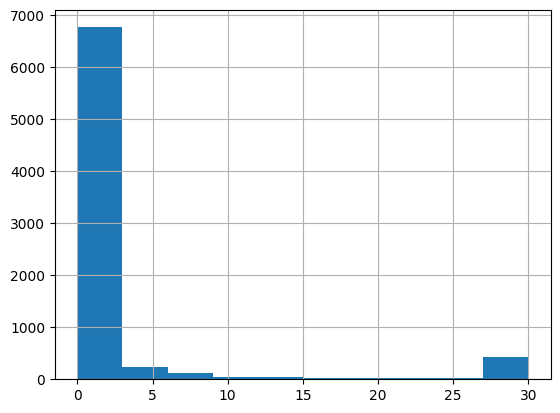

In [ ]:
().dropna().dt.days.clip(upper=30).hist()

# Q3. Your individual submission 

Your individual submission on Week 2 (from the sheet to be shared on Friday) will have two broad questions. One of these will be related to the Claude artifact that will be shared on Friday. The other will be related to this work. The question will be on the Friday assignment's sheet so you do not have to submit two sheets. It is posted here so you can see where we are going. 

## Defining helpfulness 

Describe two different ways of operationalising helpfulness. Report on these with descriptive statistics. One of these should be the form of helpfulness that is discussed in the group presentation. One should be a version that you have determined individually. It does need to not be complicated. Articulate the difference between these two interpretations of helpfulness and why you might opt for one over the other in some circumstance. Use evidence derived from code.

The write up for this should be no longer than 300 words. Thus we are not expecting much exposition in terms of lit review or setup at this time. We will provide written feedback on your individual assignment. 

The feedback will be focused on: 
- **Writing**: Is it clear, have you presented a reasonable rationale for helpfulness and your interpretation of the data? 
- **Aesthetics**: Have you presented your data in a way that is legible? Can you print or display in a Jupyter Lab notebook data in a useful manner beyond raw `print(len(<object>))`?
- **Code**: Is your code clear? That is, is your code modular, with short comments. You can use code from your group project within this so long as there is some additional code that you have written or some way to signify your own contribution to the code. (i.e. you do not have to rewrite the group's code base, only make use of it if warranted)

You will also be asked to write an AI declaration. We are not inhibiting your use of AI tools, but we need to understand how deeply these are entwined within your practice. 